In [101]:
import numpy as np
import torch

idx = 1
# Define simulation parameters
dim = 2

N = 256

# sample_rate = np.random.uniform(self.sample_rate, 0.3)
t = np.arange(N) # time axis
max_J = 10

# Generate FID signals
J = np.random.randint(1, max_J+1, size=(dim,1))   # Random number of harmonics
mask = np.zeros((dim, max_J))
mask[np.arange(dim), J.ravel()-1] = 1  # TODO
mask = np.cumsum(mask, axis=1)

ph = np.random.uniform(0.0, 2*np.pi, size=(dim, max_J))  # Random phase  # TODO
A = np.random.uniform(0.05, 1.0, size=(dim, max_J))  # Random amplitude
w = np.random.uniform(0.01, 0.99, size=(dim, max_J))  # Random frequency
sgm = np.random.uniform(10, 179.2, size=(dim, max_J))  # Random relaxation time
t = np.arange(N) # Time axis

A = np.multiply(A, mask)
x = A[..., None] * np.exp(1j * ph[..., None]) * np.exp(-t / sgm[..., None]) * np.exp(1j*2*np.pi*w[..., None]*t)
xn_unit = np.matmul(x[0][:, :, np.newaxis], x[0][:, np.newaxis])
clean_xn = np.sum(xn_unit, axis=0)

# Add noise to FID signals
noise_scale = 1e-4
noise = np.random.normal(loc=0.0, scale=noise_scale, size=(N, N))
xx = clean_xn
# xx = noise + clean_xn

GT_label = np.fft.fft2(xx)

# Generate undersampling mask     
Mask = np.load('poisson_gap_mask/'+str(N)+'/Mask_poisson_'+str(idx%10000)+'.npy')  # TODO
idx_ones = np.where(Mask==1)
U = Mask
U1 = np.random.random()*np.ones([N, N]) + np.random.random([N, N])/5 -0.1
U1[idx_ones]= 1

NUS_FID = np.multiply(U, xx)
NOISE_FID = np.multiply(U1, xx)
# NOISE_FID = NOISE_FID / np.max(NOISE_FID)
NOISE_input = np.fft.fft2(NOISE_FID)
power_of_10 = int(np.log10(np.max([np.real(NOISE_input), np.imag(NOISE_input)]))) + 1 if np.max([np.real(NOISE_input), np.imag(NOISE_input)]) != 0 else 1
NOISE_input = NOISE_input / 10 ** power_of_10
GT_label = GT_label / 10 ** power_of_10
print(10 ** power_of_10)

# mul = np.max(np.abs(NOISE_input)) * 2
# mul = 500
# net_input = np.concatenate([NOISE_input[np.newaxis], NUS_FID[np.newaxis]], axis=0)
# net_input = torch.complex(torch.from_numpy(net_input.real).float(), torch.from_numpy(net_input.imag).float()) / mul
# net_label = torch.complex(torch.from_numpy(GT_label.real).float(), torch.from_numpy(GT_label.imag).float()) / mul


1000


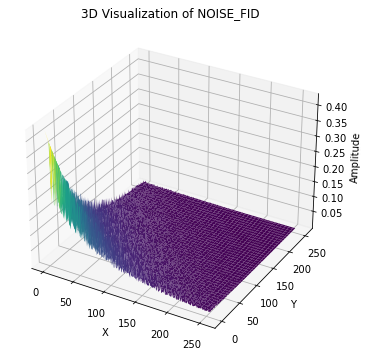

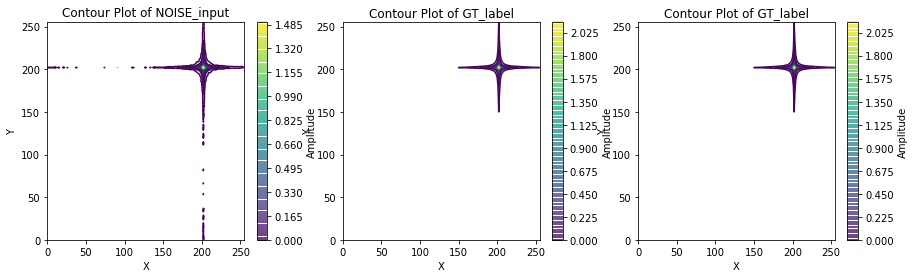

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 三维可视化 NOISE_FID
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(range(NOISE_FID.shape[0]), range(NOISE_FID.shape[1]))
ax.plot_surface(x, y, np.abs(NOISE_FID), cmap='viridis')
ax.set_title('3D Visualization of NOISE_FID')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Amplitude')

# 等高线图可视化 NOISE_input 和 GT_label
fig = plt.figure(figsize=(15, 4))
contour_levels = 100
ax = fig.add_subplot(131)
contour_input = ax.contour(np.abs(NOISE_input), levels=contour_levels, cmap='viridis')
ax.set_title('Contour Plot of NOISE_input')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(contour_input, ax=ax, label='Amplitude')
ax = fig.add_subplot(132)
contour_input = ax.contour(np.abs(GT_label), levels=contour_levels, cmap='viridis')
ax.set_title('Contour Plot of GT_label')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(contour_input, ax=ax, label='Amplitude')
ax = fig.add_subplot(133)
contour_input = ax.contour(np.abs(GT_label), levels=contour_levels, cmap='viridis')
ax.set_title('Contour Plot of GT_label')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(contour_input, ax=ax, label='Amplitude')
plt.show()

In [105]:
print(np.max(np.imag(NOISE_input)))

1.4382764641130747
